# Libraries:

In [ ]:
pip install pywaffle

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.6/25.6 MB 98.4 MB/s eta 0:00:00


In [ ]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt
from pywaffle import Waffle
import plotly.express as px
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Data

In [ ]:
#Read Riyadh Metro data from CSV file and convert to DataFrame
df = pd.read_csv("riyadh_metro_data.csv")

In [ ]:
# Show first 5 columns
df.head()

,Ticket ID,Ticket Type,Ticket Class,Base Price,Age,Discount Category,Final Price,Journey Status,Refund Request,Delay Reason,Payment Method,Method,Start Station,End Station,Journey Date,Gender
0,TKT1000000,1 Month,Standard,140,79,Senior,70.0,On Time,No,NaN,Apple Pay,Darb App,King Fahad Library,Imam University,2025-01-23,Female
1,TKT1000001,7 Days,First Class,100,13,School Student,50.0,Cancelled,Yes,NaN,Card,Gate Payment,King Fahad District,Qasr Al Hokm,2025-04-14,Male
2,TKT1000002,3 Days,First Class,50,25,University Student,25.0,Delayed,No,Maintenance,Apple Pay,Darb App,Ghornata,Qasr Al Hokm,2024-12-23,Female
3,TKT1000003,2 Hours,Standard,4,8,School Student,2.0,On Time,No,NaN,Apple Pay,TVM,Alinma,KKIA,2025-04-06,Female
4,TKT1000004,2 Hours,Standard,4,68,Senior,2.0,On Time,No,NaN,Apple Pay,Darb App,National Museum,SABB,2024-12-22,Female


#Explore the data:

In [ ]:
# get the shape and size of the DataFrame
print(f"The shape is :{df.shape}")
print(f"The size is :{df.size} ")

The shape is :(10000, 16)
The size is :160000 


In [ ]:
# get the columns
print(df.columns)

Index(['Ticket ID', 'Ticket Type', 'Ticket Class', 'Base Price', 'Age',
       'Discount Category', 'Final Price', 'Journey Status', 'Refund Request',
       'Delay Reason', 'Payment Method', 'Method', 'Start Station',
       'End Station', 'Journey Date', 'Gender'],
      dtype='object')


In [ ]:
# get the informations
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Ticket ID          10000 non-null  object 
 1   Ticket Type        10000 non-null  object 
 2   Ticket Class       10000 non-null  object 
 3   Base Price         10000 non-null  int64  
 4   Age                10000 non-null  int64  
 5   Discount Category  10000 non-null  object 
 6   Final Price        10000 non-null  float64
 7   Journey Status     10000 non-null  object 
 8   Refund Request     10000 non-null  object 
 9   Delay Reason       3348 non-null   object 
 10  Payment Method     10000 non-null  object 
 11  Method             10000 non-null  object 
 12  Start Station      10000 non-null  object 
 13  End Station        10000 non-null  object 
 14  Journey Date       10000 non-null  object 
 15  Gender             9900 non-null   object 
dtypes: float64(1), int64(2)

In [ ]:
# get Journey Date type
df['Journey Date'].dtype

dtype('O')

In [ ]:
#Display the statistical description of the numerical columns
print(df.describe())

         Base Price           Age   Final Price
count  10000.000000  10000.000000  10000.000000
mean      90.862800     40.613100     58.991100
std      109.127236     22.965556     82.438764
min        4.000000      1.000000      0.000000
25%       20.000000     21.000000      5.000000
50%       50.000000     41.000000     25.000000
75%      140.000000     61.000000     70.000000
max      350.000000     80.000000    350.000000


In [ ]:
# Count the null values
df.isnull().sum()

,0
Ticket ID,0
Ticket Type,0
Ticket Class,0
Base Price,0
Age,0
Discount Category,0
Final Price,0
Journey Status,0
Refund Request,0
Delay Reason,6652


In [ ]:
# Show if there is any duplicated rows
print(df.duplicated().sum())

0


In [ ]:
df['Delay Reason'].value_counts()

,count
Delay Reason,
Maintenance,1682
Technical Issue,1666


In [ ]:
# show the sum of null values for each category in Delay Reason
df['Delay Reason'].isna().groupby(df['Journey Status']).sum()

,Delay Reason
Journey Status,
Cancelled,3320
Delayed,0
On Time,3332


In [ ]:
# Show the percentage of missing values in Gender column
gender_null_per = df['Gender'].isnull().mean() * 100
print(f"Gender Missing Percentage: {gender_null_per} %")

Gender Missing Percentage: 1.0 %


In [ ]:
#get the unique values in coulumns
columns = ['Ticket Type','Ticket Class','Discount Category','Journey Status','Delay Reason','Gender','Refund Request']
for col in columns:
  print(f"{col} : {df[col].unique()}")


Ticket Type : ['1 Month' '7 Days' '3 Days' '2 Hours']
Ticket Class : ['Standard' 'First Class']
Discount Category : ['Senior' 'School Student' 'University Student' 'Adult' 'Child']
Journey Status : ['On Time' 'Cancelled' 'Delayed']
Delay Reason : [nan 'Maintenance' 'Technical Issue']
Gender : ['Female' 'Male' nan]
Refund Request : ['No' 'Yes']


In [ ]:
  # find The age column outliers
  Q1 = df['Age'].quantile(0.25)
  Q3 = df['Age'].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  age_outliers = df[(df['Age'] < lower_bound) | (df['Age'] > upper_bound)]
  print(f"Age Outliers : {len(age_outliers)}")

Age Outliers : 0


<Axes: xlabel='Age'>

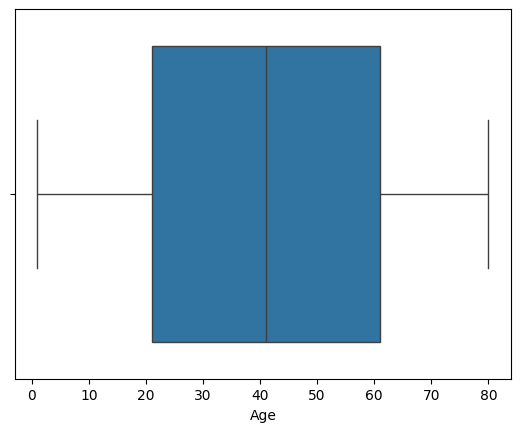

In [ ]:
# show the boxplot
sns.boxplot(x = df['Age'])

In [ ]:
# get the minimum and maximum age
print(f"The minimum age is: {df['Age'].min()}")
print(f"The maximim age is: {df['Age'].max()}")

The minimum age is: 1
The maximim age is: 80


# Data Cleaning:

In [ ]:
# Drop Ticket Id column
df.drop('Ticket ID',axis=1 , inplace= True)

In [ ]:
df.head()

,Ticket Type,Ticket Class,Base Price,Age,Discount Category,Final Price,Journey Status,Refund Request,Delay Reason,Payment Method,Method,Start Station,End Station,Journey Date,Gender
0,1 Month,Standard,140,79,Senior,70.0,On Time,No,NaN,Apple Pay,Darb App,King Fahad Library,Imam University,2025-01-23,Female
1,7 Days,First Class,100,13,School Student,50.0,Cancelled,Yes,NaN,Card,Gate Payment,King Fahad District,Qasr Al Hokm,2025-04-14,Male
2,3 Days,First Class,50,25,University Student,25.0,Delayed,No,Maintenance,Apple Pay,Darb App,Ghornata,Qasr Al Hokm,2024-12-23,Female
3,2 Hours,Standard,4,8,School Student,2.0,On Time,No,NaN,Apple Pay,TVM,Alinma,KKIA,2025-04-06,Female
4,2 Hours,Standard,4,68,Senior,2.0,On Time,No,NaN,Apple Pay,Darb App,National Museum,SABB,2024-12-22,Female


In [ ]:
# Get the most common value in Gender column
mode_gender = df['Gender'].mode()[0]
print(f"Mode Gender: {mode_gender}")

Mode Gender: Male


In [ ]:
# Fill the missing values for the 'Gender' feature with the most common port
df['Gender'].fillna(mode_gender, inplace= True)

In [ ]:
# just for check
print(f"The number of missing Values in Gender col is: {df['Gender'].isna().sum()}")

The number of missing Values in Gender col is: 0


In [ ]:
df['Gender'].value_counts()

,count
Gender,
Male,5060
Female,4940


In [ ]:
# Fill the missing values for the 'Dealy Reason' feature with the value 'No Delay'
df['Delay Reason'].fillna('No Delay', inplace= True)

In [ ]:
# just for check
print(f"The number of missing Values in Dealy Reason col is: {df['Delay Reason'].isna().sum()}")

The number of missing Values in Dealy Reason col is: 0


In [ ]:
# Convert Journey Date to datetime
df['Journey Date'] = pd.to_datetime(df['Journey Date'])

#Feature Engineering

In [ ]:
# add column Journey Day
df['Journey Day'] = df['Journey Date'].dt.day_name()

In [ ]:
# add column Age Group
def categorize_age(age):
    if age <= 12:
        return 'Child'
    elif 13 <= age <= 17:
        return 'Teen'
    elif 18 <= age <= 24:
        return 'Young Adult'
    elif 25 <= age <= 59:
        return 'Adult'
    else:
        return 'Senior'

df['Age Group'] = df['Age'].apply(categorize_age)


In [ ]:
# Rename the column Method with Ticket Source
df.rename(columns= {'Method': 'Ticket Source','Base Price': 'Base Price (SAR)','Final Price':'Final Price (SAR)'},inplace=True)

In [ ]:
df.head()

,Ticket Type,Ticket Class,Base Price (SAR),Age,Discount Category,Final Price (SAR),Journey Status,Refund Request,Delay Reason,Payment Method,Ticket Source,Start Station,End Station,Journey Date,Gender,Journey Day,Age Group
0,1 Month,Standard,140,79,Senior,70.0,On Time,No,No Delay,Apple Pay,Darb App,King Fahad Library,Imam University,2025-01-23,Female,Thursday,Senior
1,7 Days,First Class,100,13,School Student,50.0,Cancelled,Yes,No Delay,Card,Gate Payment,King Fahad District,Qasr Al Hokm,2025-04-14,Male,Monday,Teen
2,3 Days,First Class,50,25,University Student,25.0,Delayed,No,Maintenance,Apple Pay,Darb App,Ghornata,Qasr Al Hokm,2024-12-23,Female,Monday,Adult
3,2 Hours,Standard,4,8,School Student,2.0,On Time,No,No Delay,Apple Pay,TVM,Alinma,KKIA,2025-04-06,Female,Sunday,Child
4,2 Hours,Standard,4,68,Senior,2.0,On Time,No,No Delay,Apple Pay,Darb App,National Museum,SABB,2024-12-22,Female,Sunday,Senior


#Data Visualization

## **1.Customer Analysis:**

###What age group uses the metro the most?

In [ ]:
# Calculate the percentage distribution of each age group and convert the result to a dictionary
age_data = df['Age Group'].value_counts(normalize=True) * 100
age_data = age_data.round(2).to_dict()

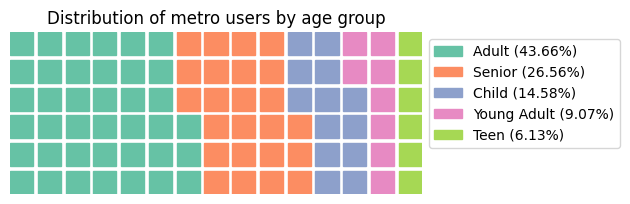

In [ ]:
# Create a Waffle chart to visualize the distribution of metro users by age group
fig = plt.figure(
    FigureClass=Waffle,
    rows=6,
    columns=15,
    values=age_data,
    title={'label': 'Distribution of metro users by age group', 'loc': 'center'},
    labels=[f"{k} ({v}%)" for k, v in age_data.items()],
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1)},

)


plt.show()

### Which category get the most discounted tickets?

In [ ]:
# Filter the data to include only rows where the discount category is not 'Adult' // (because the adult cat don't has a dicount) //
dicount_cat = df[df['Discount Category'] != 'Adult']

In [ ]:
dicount_cat ['Discount Category'].value_counts()

,count
Discount Category,
Senior,2656
School Student,1518
University Student,1505
Child,702


Text(0.5, 1.0, 'The Most Discount Category')

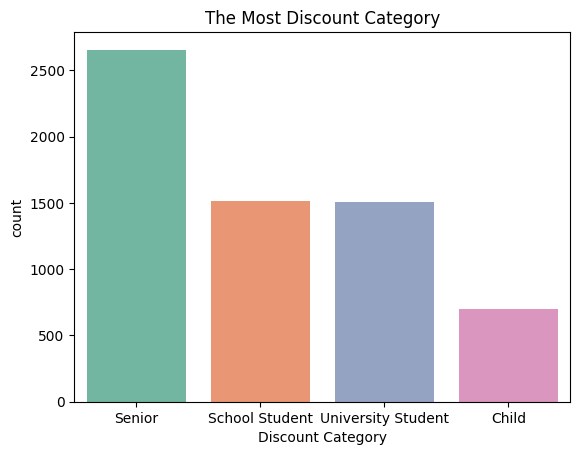

In [ ]:
#Create a count plot to show the distribution  discount categories
sns.countplot(x = dicount_cat['Discount Category'],palette="Set2")
plt.title("The Most Discount Category")

###Is there a difference in using the metro between males and females, and which group uses it more?

In [ ]:
df['Gender'].value_counts(normalize=True) *100

,proportion
Gender,
Male,50.6
Female,49.4


## **2.Time Analysis:**

###Are there certain months or days that witness an increase in journeys?

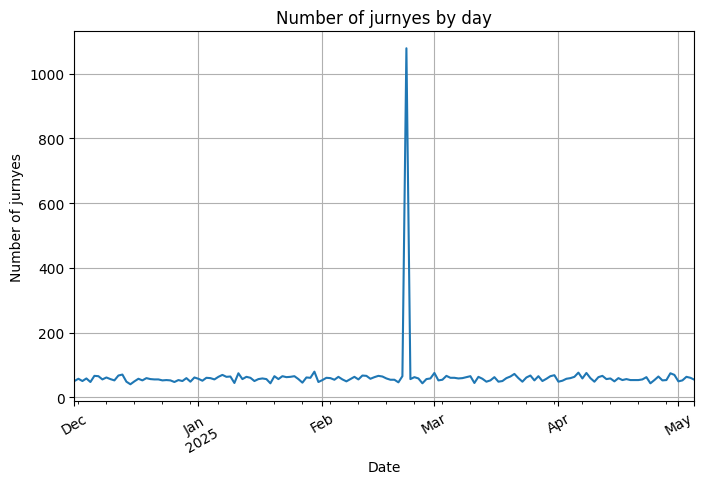

In [ ]:
# Line plot showing the number of journeys per day
daily_journey = df.groupby('Journey Date').size()
plt.figure().set_figwidth(8)
daily_journey.plot(kind= 'line')
plt.title('Number of jurnyes by day')
plt.xlabel('Date')
plt.ylabel('Number of jurnyes')
plt.xticks(rotation=30, fontsize=10,)
plt.grid(True)
plt.show()

In [ ]:
# Grouping the data by journey date and counting the number of trips per day,
# then sorting the result to identify the days with the highest number of journeys.
df.groupby('Journey Date').size().sort_values(ascending=False)

,0
Journey Date,
2025-02-22,1079
2025-01-30,79
2025-04-06,76
2025-03-01,75
2025-04-08,75
...,...
2025-01-10,44
2025-02-26,43
2025-01-19,43


In [ ]:
# Filtering out February-22-2025 from the dataset to avoid bias
# then grouping the remaining data by journey date to count trips per day.
day_filterd = df[df['Journey Date'] != '2025-02-22']
x = day_filterd.groupby('Journey Date').size()
x

,0
Journey Date,
2024-12-01,50
2024-12-02,57
2024-12-03,50
2024-12-04,58
2024-12-05,47
...,...
2025-05-01,49
2025-05-02,52
2025-05-03,63


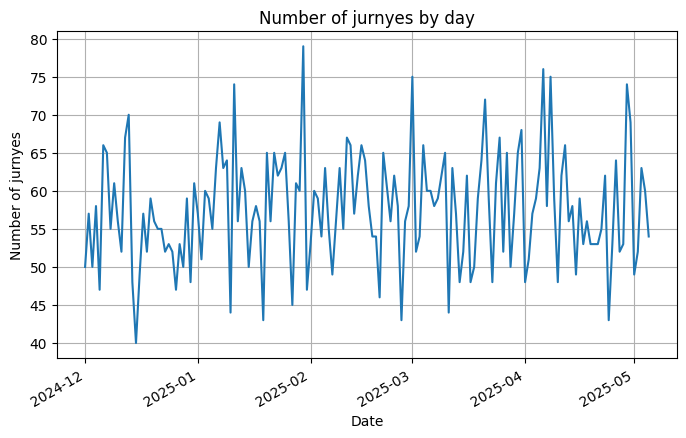

In [ ]:
# Plotting the number of journeys per day (excluding Feb 22) using a line chart.
# This helps visualize trends and fluctuations in daily metro usage.
plt.figure().set_figwidth(8)
x.plot(kind= 'line')
plt.title('Number of jurnyes by day')
plt.xlabel('Date')
plt.ylabel('Number of jurnyes')
plt.xticks(rotation=30, fontsize=10,)
plt.grid(True)
plt.show()

###What is the most popular day for Journeys?

In [ ]:
popular_day= day_filterd['Journey Day'].value_counts()
popular_day

,count
Journey Day,
Monday,1309
Sunday,1298
Tuesday,1284
Wednesday,1269
Friday,1261
Saturday,1258
Thursday,1242


##**3.Price and revenue analysis:**

###What is the most sold ticket?

In [ ]:
df['Ticket Type'].value_counts(normalize=True) *100

,proportion
Ticket Type,
7 Days,25.64
1 Month,25.16
3 Days,24.78
2 Hours,24.42


###What is the average final price of the ticket?

In [ ]:
fp_average = df['Final Price (SAR)'].mean().round(2)
print(f'The average of tickets final Price:{fp_average}')

The average of tickets final Price:58.99


###What is the percentage of revenu on February 22 of the total revenus?

In [ ]:
# Calculating the total revenue on February 22 and comparing it to the overall revenue.
# This provides insight into the financial impact of that specific day.
feb_22_revenu = df[df['Journey Date'] == '2025-02-22']['Final Price (SAR)'].sum()
total_revenu = df['Final Price (SAR)'].sum()
revenu_per = ((feb_22_revenu / total_revenu ) *  100).round(2)
print(f"The percentage of revenu on February 22 from total revenu is: {revenu_per}%")

The percentage of revenu on February 22 from total revenu is: 11.22%


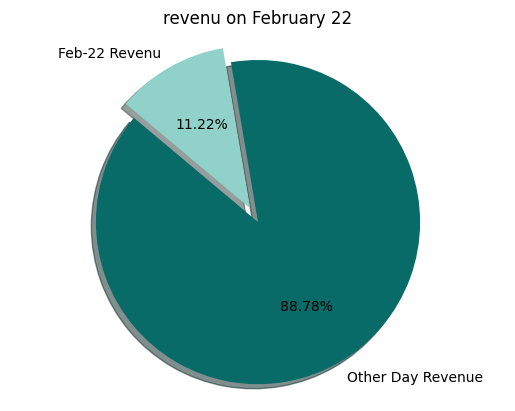

In [ ]:
# Creating a pie chart to visualize the revenue distribution between February 22
# and all other days.
other_day_revenu = total_revenu - feb_22_revenu
labels =['Other Day Revenue','Feb-22 Revenu']
values = [other_day_revenu ,feb_22_revenu ]
colors = ['#096B68','#90D1CA']
sizes = [215, 130]
explode = [0, 0.1]
# Create a pie chart
plt.pie(values, labels=labels, autopct='%1.2f%%',explode=explode,colors=colors,shadow=True, startangle=140)

plt.axis('equal')

# Add a title
plt.title('revenu on February 22')

plt.show()

##**4.Payment method analysis:**

###What is the most commonly used payment method?

In [ ]:
df['Payment Method'].value_counts()

,count
Payment Method,
Apple Pay,4331
Card,4323
Cash,1346


###Do users prefer to buy tickets from the app or use other methods?

In [ ]:
df['Ticket Source'].value_counts(normalize=True) * 100

,proportion
Ticket Source,
Ticket Office,25.21
TVM,25.08
Gate Payment,25.00
Darb App,24.71


###Does the payment method differ according to age group?

In [ ]:
# Grouping the data by payment method and age group to count the number of users in each combination.
# This helps analyze how payment preferences vary across different age groups.
df.groupby(['Ticket Source', 'Age Group'])['Age Group'].size()

Ticket Source  Age Group  
Darb App       Adult          1067
               Child           354
               Senior          663
               Teen            159
               Young Adult     228
Gate Payment   Adult          1089
               Child           397
               Senior          660
               Teen            134
               Young Adult     220
TVM            Adult          1099
               Child           355
               Senior          655
               Teen            156
               Young Adult     243
Ticket Office  Adult          1111
               Child           352
               Senior          678
               Teen            164
               Young Adult     216
Name: Age Group, dtype: int64

In [ ]:
# Creating a grouped histogram to visualize how different age groups purchase metro tickets based on the ticket source.
# This helps identify any preferences in ticket acquisition channels across age demographics.
fig = px.histogram(df,
                   x="Age Group",
                   color="Ticket Source",
                   barmode="group",
                   color_discrete_sequence=px.colors.qualitative.Set2)

fig.update_layout(
    title='Payment Method by Age Group',
    title_x =0.5,
    xaxis_title='Age Group',
    yaxis_title='User Count',
    legend_title='Ticket Source'
)

fig.show()

## **5.Journeys Analysis:**

###What is the percentage of journeys that arrived on time compared to delayed or canceled journeys?

In [ ]:
# Calculating the distribution of different journey statuses (e.g., completed, cancelled).
# This helps understand the overall success or failure rate of metro trips.
journey_per = df['Journey Status'].value_counts()
journey_per = journey_per.to_dict()
journey_per

{'Delayed': 3348, 'On Time': 3332, 'Cancelled': 3320}

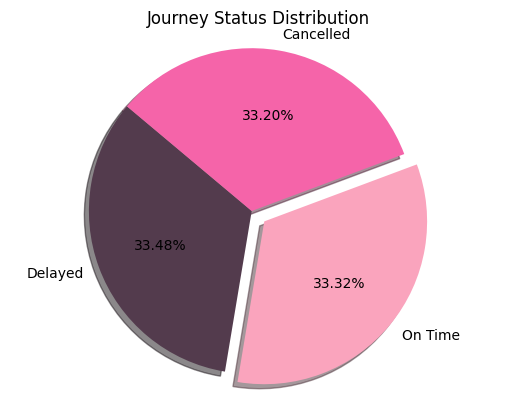

In [ ]:
labels = journey_per.keys()
values = journey_per.values()
colors = ['#533B4D','#FAA4BD','#F564A9']
sizes = [215, 130, 245]
explode = [0, 0.1, 0]
# Create a pie chart
plt.pie(values, labels=labels, autopct='%1.2f%%',explode=explode,colors=colors,shadow=True, startangle=140)

plt.axis('equal')

# Add a title
plt.title('Journey Status Distribution')

plt.show()

### What is the most common cause of journey delays?

In [ ]:
# Filtering the dataset to include only delayed trips and
# counting the frequency of each delay reason to identify the most common causes of delay.
delay_res=df[df['Delay Reason'] != 'No Delay']
delay_res['Delay Reason'].value_counts()

,count
Delay Reason,
Maintenance,1682
Technical Issue,1666


###What is the percentage of journeys for which a refund has been requested?

In [ ]:
df['Refund Request'].value_counts(normalize=True)*100

,proportion
Refund Request,
No,66.8
Yes,33.2


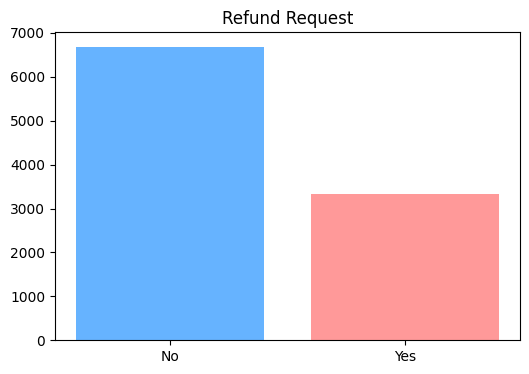

In [ ]:
# create a bar chart
a,b=df['Refund Request'].value_counts().index,df['Refund Request'].value_counts().values
plt.figure(figsize=(6, 4))
plt.bar(a,b,color=['#66b3ff', '#ff9999'])
plt.title("Refund Request")
plt.show()